<a href="https://colab.research.google.com/github/Mahsasalimi/Machine-Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rgression


### Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Data Exploration
Let's first have a descriptive exploration on our data.

In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
# summarize the data
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


Visualizing the data

All the values are numerical and continuous values. We can plot each of these features:

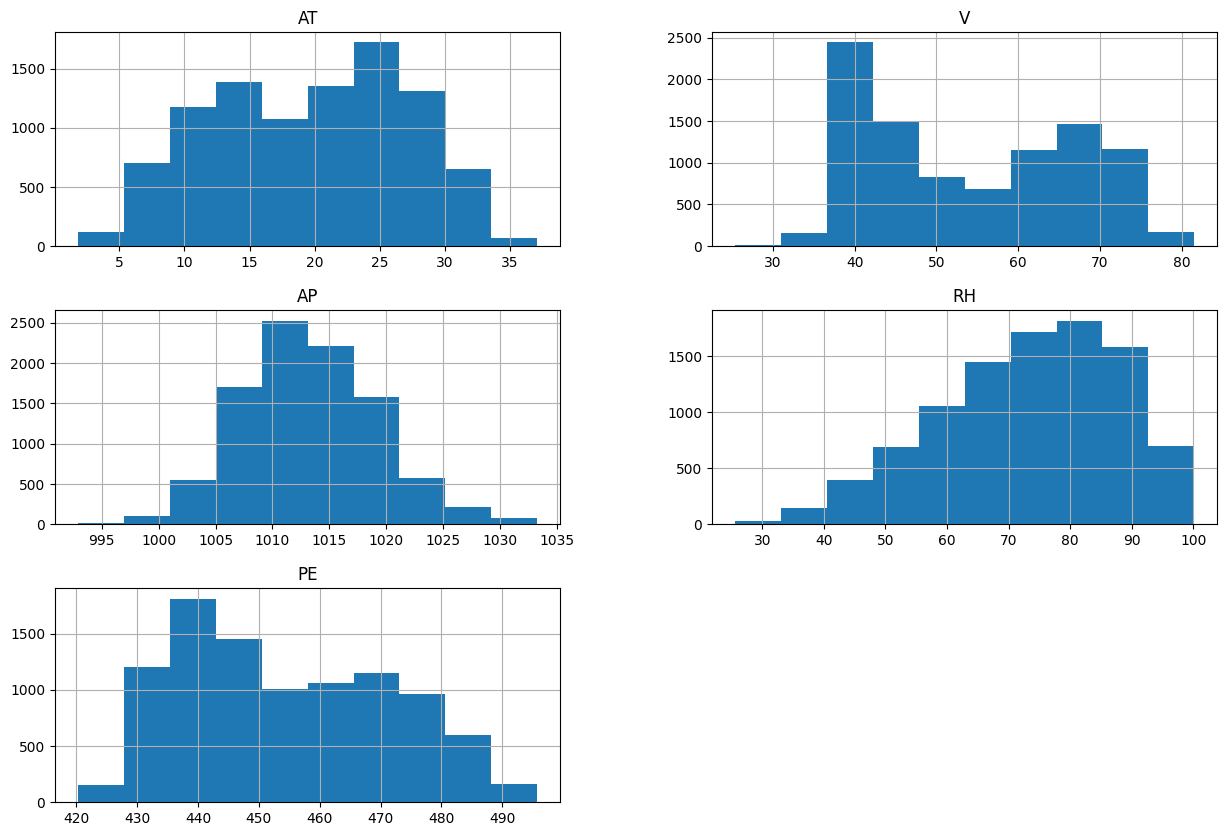

In [7]:
df.hist(figsize=(15, 10))
plt.show()

Text(0.5, 1.0, 'PE Visualization')

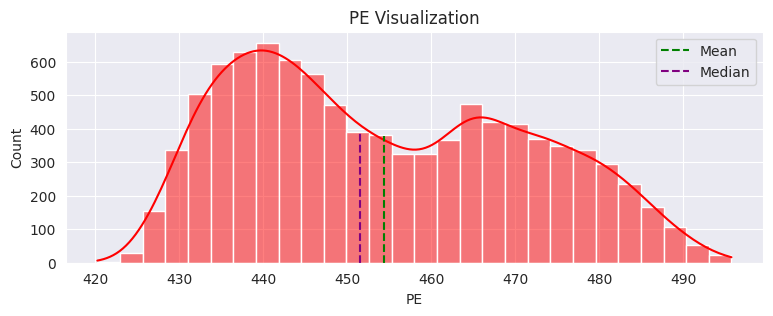

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,3))
sns.histplot(data=df,x="PE",color="red",kde=True)
plt.axvline(x=df["PE"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["PE"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("PE Visualization")

Text(0.5, 1.0, 'Cumulative PE')

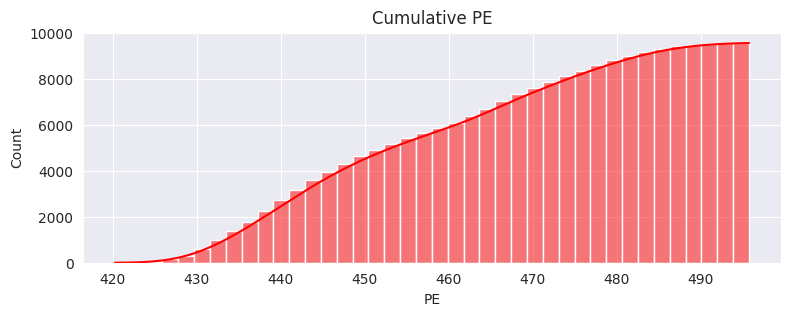

In [9]:
plt.figure(figsize = (9,3))
sns.histplot(df["PE"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative PE")

Text(0, 0.5, 'Relative Humidity')

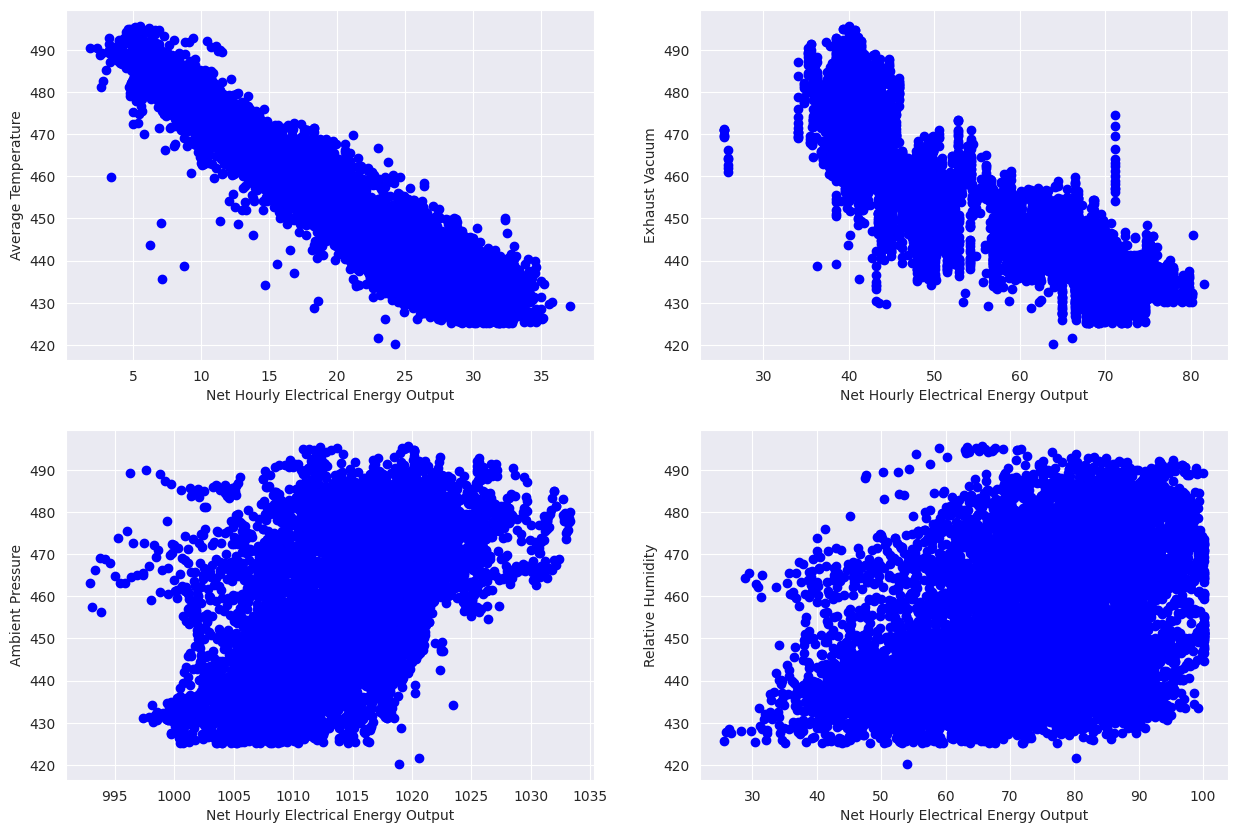

In [10]:
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
axis[0, 0].scatter(df.AT, df.PE,  color='blue')
axis[0, 0].set_xlabel("Net Hourly Electrical Energy Output")
axis[0, 0].set_ylabel("Average Temperature")
###
axis[0, 1].scatter(df.V, df.PE,  color='blue')
axis[0, 1].set_xlabel("Net Hourly Electrical Energy Output")
axis[0, 1].set_ylabel("Exhaust Vacuum")
###
axis[1, 0].scatter(df.AP, df.PE,  color='blue')
axis[1, 0].set_xlabel("Net Hourly Electrical Energy Output")
axis[1, 0].set_ylabel("Ambient Pressure")
###
axis[1, 1].scatter(df.RH, df.PE,  color='blue')
axis[1, 1].set_xlabel("Net Hourly Electrical Energy Output")
axis[1, 1].set_ylabel("Relative Humidity")

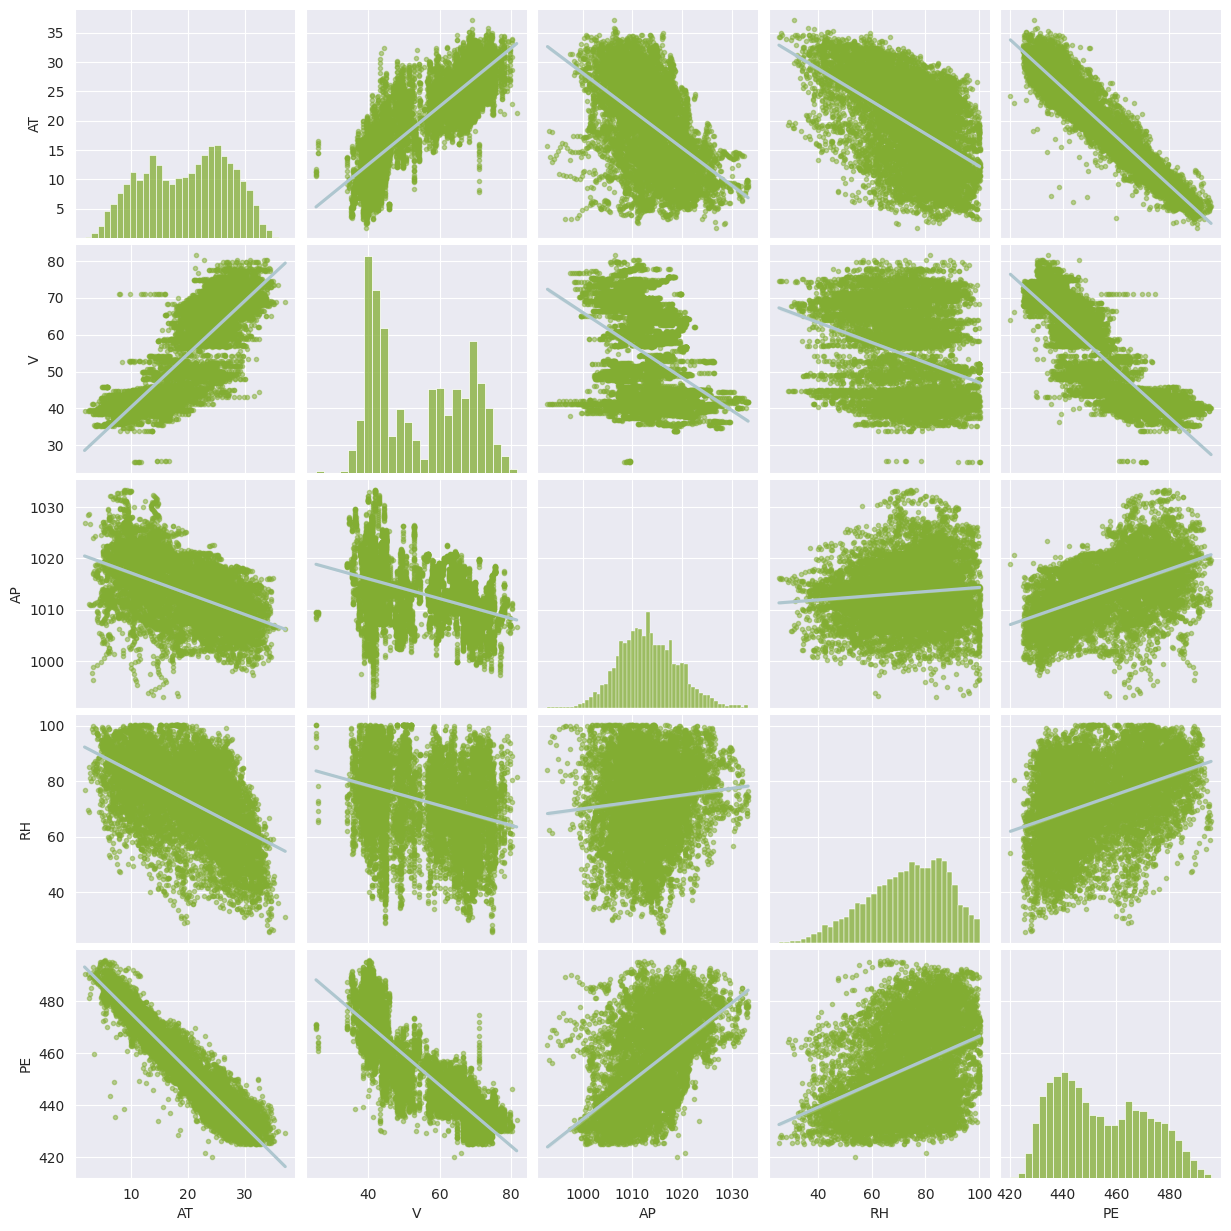

In [11]:
sns.pairplot(df,
                 markers=".",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},

                 diag_kws= {'color': '#82ad32'})

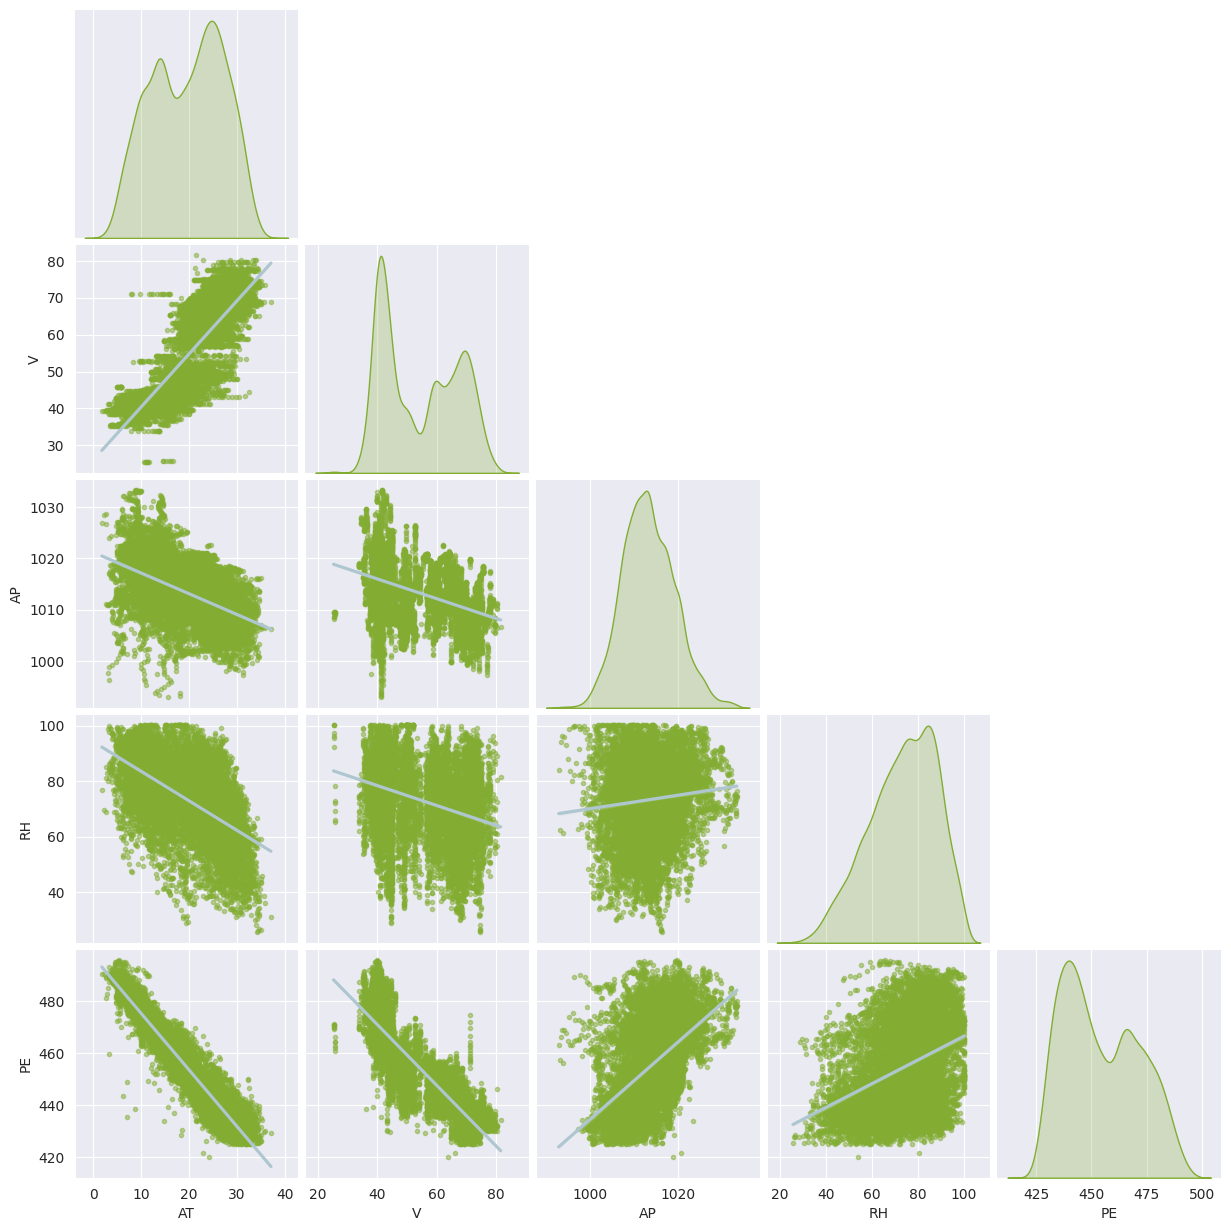

In [12]:
sns.pairplot(df,
                 markers=".",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

As observed earlier, there exists a strong positive correlation between "PE" and "AP", while there is a very strong negative correlation between "PE" and "AT" or "V".

In [13]:
df.corr()["PE"].sort_values(ascending=False)

PE    1.000000
AP    0.518429
RH    0.389794
V    -0.869780
AT   -0.948128
Name: PE, dtype: float64

Visualizing the correlation

<ipython-input-14-2e9c91db89d4>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<Axes: >

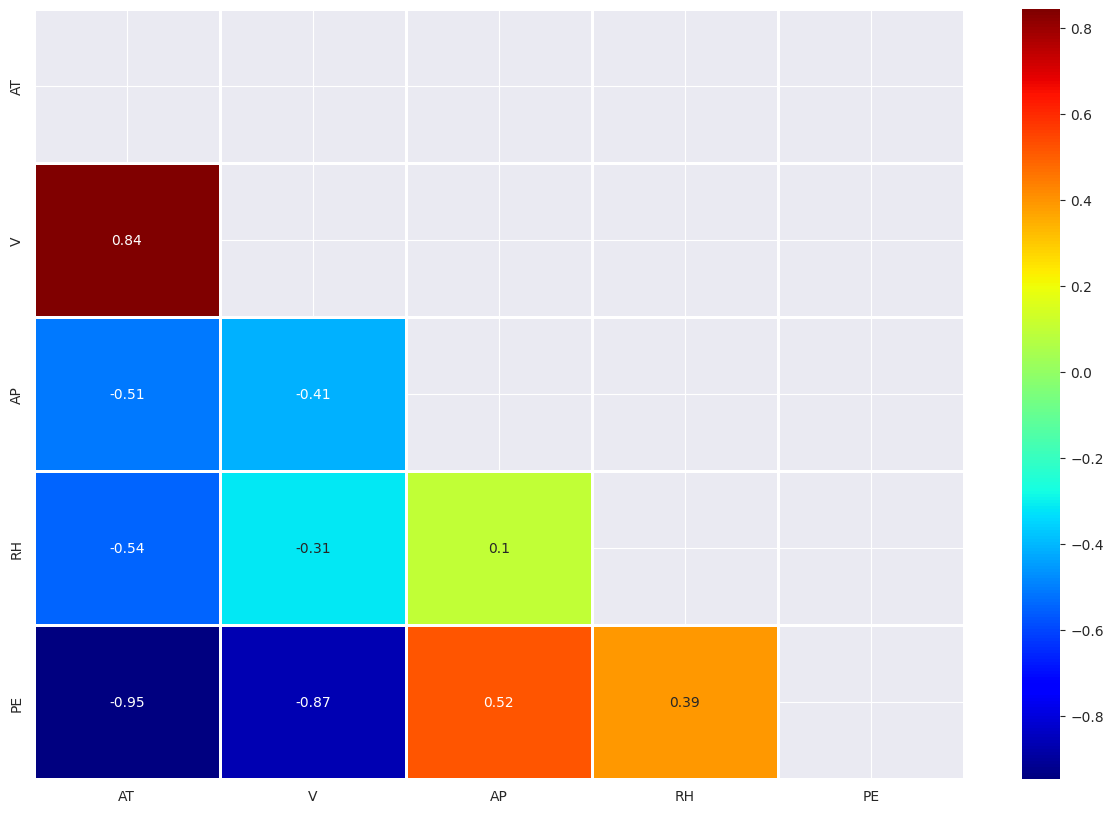

In [14]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

<Axes: >

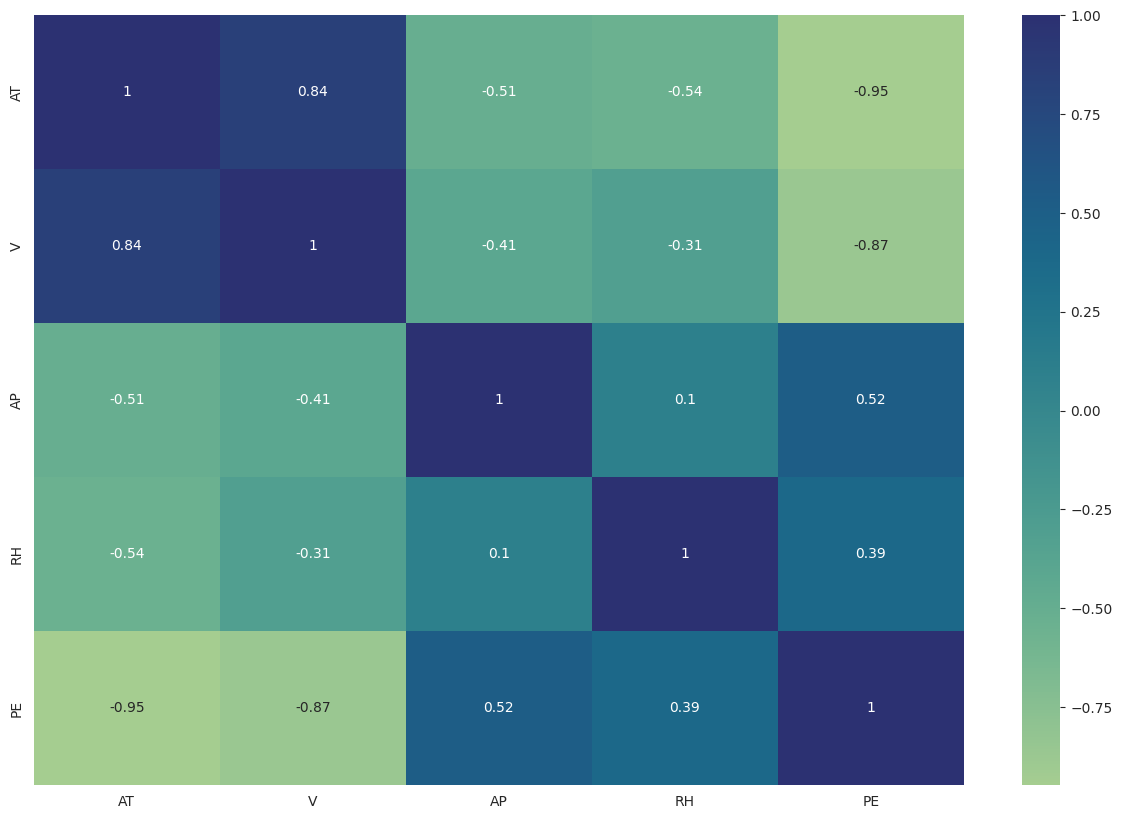

In [15]:
#another heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, cmap="crest")

### Splitting the dataset into the Training set and Test set

In [16]:
msk = np.random.rand(len(df)) < 0.8
cdf = df[['AT','V','AP','PE']]
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


#### Train data distribution

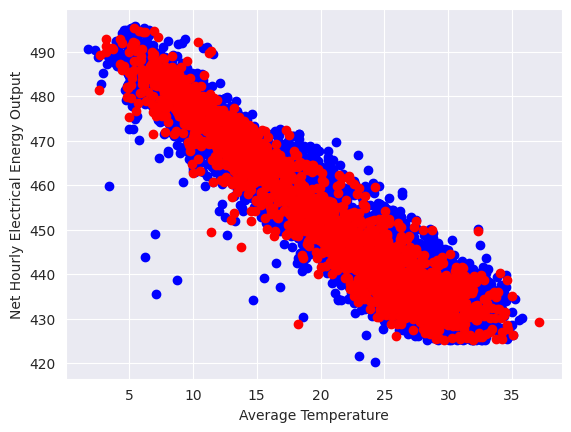

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(train.AT, train.PE,  color='blue')
ax.scatter(test.AT, test.PE,  color='red')
plt.xlabel("Average Temperature")
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

#### Modeling

Using sklearn package to model data.

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AT']])
train_y = np.asanyarray(train[['PE']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.16924845]]
Intercept:  [496.99048603]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs
We can plot the fit line over the data:

Text(0, 0.5, 'Net Hourly Electrical Energy Output')

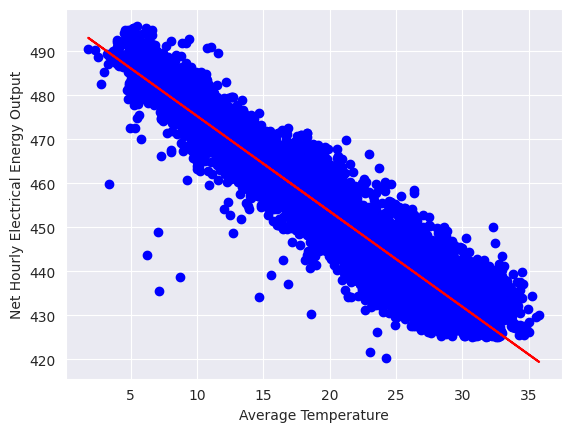

In [19]:
plt.scatter(train.AT, train.PE,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Average Temperature")
plt.ylabel("Net Hourly Electrical Energy Output")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['AT']])
test_y = np.asanyarray(test[['PE']])
y_pred = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , y_pred) )

Mean absolute error: 4.29
Residual sum of squares (MSE): 29.24
R2-score: 0.90


# Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x.
let's make 2 degree polynomial:

$y = b + \theta\_1  x + \theta\_2 x^2$$ + \theta\_3 x^3$


In [21]:
train_x = np.asanyarray(train[["AT"]])
train_y = np.asanyarray(train[["PE"]])
test_x = np.asanyarray(test[["AT"]])
test_y = np.asanyarray(test[["PE"]])

#### Modeling

Using sklearn package to model data.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
train_x_poly = poly.fit_transform(train_x)

In [23]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x_poly, train_y)

LinearRegression()

In [24]:
test_x_poly = poly.fit_transform(test_x)
y_pred = reg.predict(test_x_poly)

## evaluation

In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, test_y)
mse = np.mean((y_pred - test_y) ** 2)
abs = np.mean(np.absolute((y_pred - test_y)))
print("R2-score: %.2f" %score)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Mean absolute error: %.2f" %abs)
print("Coefficient:",reg.coef_)
print("Intercept:",reg.intercept_)

R2-score: 0.90
Residual sum of squares (MSE): 25.14
Mean absolute error: 3.97
Coefficient: [[ 0.         -0.60970132 -0.12489269  0.00266932]]
Intercept: [492.66681657]


#### Plot outputs
We can plot the fit line over the data:

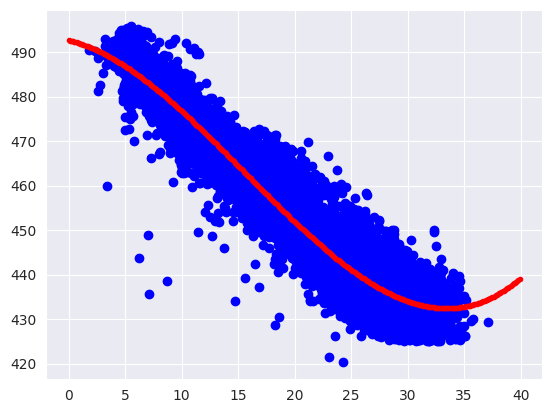

In [26]:
plt.scatter(cdf["AT"], cdf["PE"], color = "blue")
xx = np.arange(0 , 40, 0.1)
formula = reg.intercept_ + xx * reg.coef_[0][1] + (xx ** 2) * reg.coef_[0][2] + (xx ** 3) * reg.coef_[0][3]
plt.plot(xx , formula, 'r.')

# Multiple Linear Regression

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [28]:
x_train = np.asanyarray(train[["AT","V", "AP"]])
y_train = np.asanyarray(train[["PE"]])
reg.fit(x_train, y_train)


LinearRegression()

## prediction

In [29]:
x_test = np.asanyarray(test[["AT","V", "AP"]])
y_test = np.asanyarray(test[["PE"]])
y_pred = reg.predict(x_test)

## evaluation

In [30]:
mse = np.mean((y_pred - y_test) ** 2)
score = reg.score(x_test, y_test)
abs = np.mean(np.absolute((y_pred - test_y)))
print("Variance score:: %.2f" %score)
print("Residual sum of squares (MSE): %.2f" %mse)
print("Mean absolute error: %.2f" %abs)
print("Coefficient:",reg.coef_)
print("Intercept:",reg.intercept_)

Variance score:: 0.92
Residual sum of squares (MSE): 23.72
Mean absolute error: 3.88
Coefficient: [[-1.63393724 -0.32834002  0.15394085]]
Intercept: [348.33326997]
